In [1]:
import os
import pandas as pd
import webbrowser

from DataExtractor import DataExtractor
from DataUtils import *
from VizTools import *

In [21]:
# Set the path variables
_path = os.path.join(os.getcwd(), "datasets/crime")

db = 'crime_data'

start_year = 2001
end_year = 2017
all_year_data = []

for year in range(start_year, end_year+1):
    query = "SELECT * FROM crime_" + str(year) + ";"
    data_extractor = DataExtractor()
    year_df = data_extractor.read_db(db=db, query=query)
    all_year_data.append(year_df)


In [25]:
# Make a data frame that contains all the data 
data = all_year_data[0]
for ydi in range(1, len(all_year_data)):
    year_data = all_year_data[ydi]
    data = data.append(year_data, ignore_index=True)


In [45]:
# How much data did we pull?
data.shape

(6514292, 27)

In [44]:
# What are out columns?
print_columns(data)

Dataframe columns :
	 Arrest	 Beat	 Block	 Case Number	 Community Area	 Date	 Description	 District	 Domestic	 FBI Code	 ID	 IUCR	 Latitude	 Location	 Location Description	 Longitude	 Primary Type	 Updated On	 Ward	 X Coordinate	 Y Coordinate	 Year	 crime_count	 day	 month	 quarter	 week_no

In [49]:
# Let's see how much crime happened each year
year_count_data = pd.DataFrame(data['Year'].value_counts().astype(int))
year_count_data.reset_index(inplace=True)
year_count_data.columns = ['year', 'crime_count']

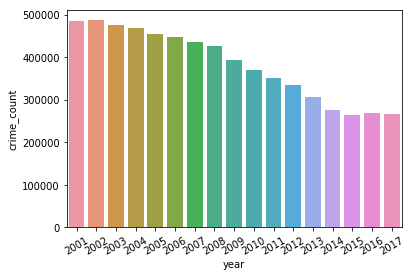

In [51]:
# Let's visualize the crime trends recorded
plot_bar(x="year", y="crime_count", df=year_count_data, xrot=30)

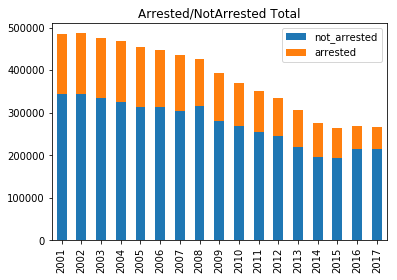

In [106]:
# What about arrests made?
arrest_map = {}
for year_data in all_year_data:
    arrest_map[year_data["Year"].unique()[0]] = dict({
        0:year_data["Arrest"].value_counts()[0],
        1:year_data["Arrest"].value_counts()[1],
    })
arrest_df = pd.DataFrame(arrest_map).transpose()
arrest_df.columns = ["not_arrested", "arrested"]

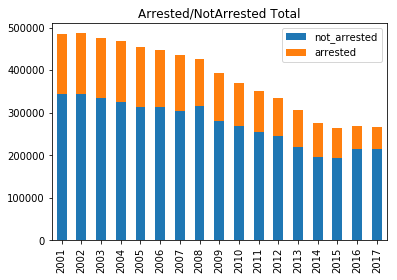

In [122]:
g = arrest_df[["not_arrested", "arrested"]].plot(kind='bar', 
                                                 stacked=True, 
                                                 title="Arrested/NotArrested Total")

In [110]:
# But was there a percentage change?
arrest_df["not_arrested_%"] = arrest_df.apply(lambda row: 
                                              (row["not_arrested"] / (row["not_arrested"] + row["arrested"])) * 100,
                                              axis=1
                                              )
arrest_df["arrested_%"] = arrest_df.apply(lambda row: 100-row["not_arrested_%"], axis=1)


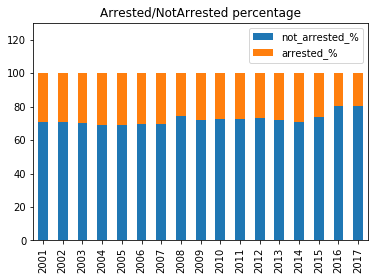

In [126]:
g = arrest_df[["not_arrested_%", "arrested_%"]].plot(kind='bar', stacked=True, 
                                                     title="Arrested/NotArrested percentage", 
                                                     ylim=[0, 130])